## 🐍 시계열 데이터 상관성 분석 (ACF & PACF)

시계열 데이터의 숨겨진 패턴을 파악하는 데 필수적인 **자기상관 함수(ACF)** 와 **부분 자기상관 함수(PACF)** 의 개념을 배우고, `statsmodels`와 `plotly`를 사용하여 시각화 및 해석하는 방법을 실습합니다.

---

## 1. 데이터 준비 및 시계열 시각화

### 💡 개념 (Concept)

시계열 분석의 첫걸음은 데이터를 불러와 시간의 흐름에 따른 변화를 시각적으로 확인하는 것입니다. 이를 통해 데이터의 전반적인 **추세(Trend)**, **계절성(Seasonality)**, 불규칙한 **변동(Irregularity)** 등의 특징을 직관적으로 파악할 수 있습니다.

### 💻 예시 코드 (Example Code)

`pandas`로 데이터를 불러오고 `plotly.express`를 사용해 월별 출생아 수 데이터를 시각화하는 예시입니다.

In [2]:
import koreanize_matplotlib
koreanize_matplotlib.koreanize()

In [3]:
import pandas as pd
pd.options.plotting.backend = "plotly"
import numpy as np
import plotly.express as px

# 데이터 로드 및 전처리
df_birth = pd.read_csv('../datasets/tsa/korean-births-stats.csv', index_col=0, parse_dates=True)
df_birth.replace('-', np.nan, inplace=True)
df_birth = df_birth.astype(float)
df_birth.index.freq = 'MS' # 월별 데이터 명시

# Plotly Express를 사용한 시계열 데이터 시각화
fig = px.line(df_birth, y='출생아수', title='한국 월별 출생아 수 (1981-2024)')
fig.update_layout(xaxis_title="연도", yaxis_title="출생아 수")
fig.show()

### ✏️ 연습 문제 (Practice Problems)

1.  **항공 승객 데이터 시각화**: 아래 URL은 1949년부터 1960년까지의 월별 항공 승객 수를 담고 있는 유명한 시계열 데이터셋입니다.
    
    이 데이터를 `pandas`로 불러온 뒤, `plotly.express`를 사용하여 시계열 그래프를 그리고 장기적인 추세와 계절성이 어떻게 나타나는지 관찰해 보세요.
    * 데이터 URL: `https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv`

In [5]:
# 연습 문제 1번 풀이 공간
import pandas as pd
import plotly.express as px

# 1. 데이터 불러오기 (URL로부터 직접)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df_passengers = pd.read_csv(url, header=0, index_col=0, parse_dates=True)
df_passengers.columns = ["승객 수"]

# 2. Plotly를 사용한 시계열 그래프 그리기
fig = px.line(df_passengers, y="승객 수", title="월별 항공 승객 수 (1949-1960)")
fig.update_layout(xaxis_title="연도", yaxis_title="승객 수 (단위: 1000명)")
fig.show()

---

## 2. 자기상관 함수 (ACF: Autocorrelation Function)

### 💡 개념 (Concept)

**자기상관(Autocorrelation)** 이란, 시계열 데이터에서 현재 시점의 값이 과거의 값들과 얼마나 관련이 있는지를 측정한 것입니다. 예를 들어 "오늘의 주가가 어제의 주가와 얼마나 비슷한가?" 또는 "12개월 전의 주가와 얼마나 비슷한가?"를 수치로 나타냅니다.

**ACF(자기상관 함수)** 는 이러한 상관 관계를 시차(lag)별로 계산하여 보여주는 함수입니다. ACF 플롯을 통해 데이터의 추세나 계절성 패턴을 파악할 수 있습니다.

* **ACF 플롯 해석**:
    * **x축**: 시차(Lag). Lag 1은 1개 시점 전, Lag 12는 12개 시점 전과의 관계를 의미합니다.
    * **y축**: 자기상관 계수. +1에 가까우면 강한 양의 상관관계, -1에 가까우면 강한 음의 상관관계를, 0에 가까우면 관계가 없음을 의미합니다.
    * **파란색 신뢰구간**: 이 구간을 벗어나는 상관계수는 통계적으로 유의미하다고 판단합니다.

### 💻 예시 코드 (Example Code)

`statsmodels` 라이브러리로 ACF 값을 계산하고, `plotly`로 직접 시각화하여 더 동적인 그래프를 만들어 봅니다.

In [7]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from statsmodels.tsa.stattools import acf

# 예시 데이터 (월별 출생아 수)
# (위 1번 섹션에서 df_birth가 로드되었다고 가정)
series = df_birth['출생아수'].dropna()

# ACF 계산
acf_values = acf(series, nlags=40)

# Plotly를 사용한 ACF 플롯 생성
fig = go.Figure()

# ACF 막대그래프
fig.add_trace(go.Bar(
    x=np.arange(len(acf_values)),
    y=acf_values,
    name='ACF'
))

fig.update_layout(
    title='출생아 수 데이터의 자기상관 함수(ACF)',
    xaxis_title='시차(Lag)',
    yaxis_title='자기상관 계수'
)
fig.show()

내장함수를 이용한 자기상관 시각화

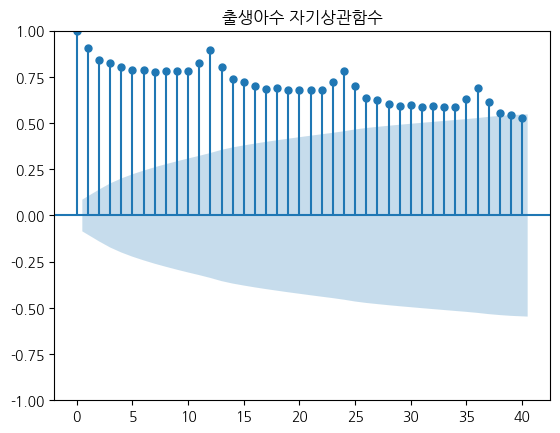

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# 시계열 데이터의 값이 시간에 따라 얼마나 상관되어 있는지를 나타냄.
plot_acf(df_birth['출생아수'],title='출생아수 자기상관함수',lags=40);

### ✏️ 연습 문제 (Practice Problems)

1.  **항공 승객 데이터 ACF 분석**: 위에서 사용한 항공 승객 데이터의 '승객 수'에 대한 ACF를 `lags=48`로 계산하고, `plotly`를 사용하여 시각화해 보세요.
2.  **ACF 플롯 해석**: 생성된 ACF 플롯을 보고 어떤 패턴이 보이는지 설명해 보세요. (예: 상관계수가 천천히 감소하는가? 특정 주기로 높은 값을 보이는가?)

In [ ]:
# 연습 문제 1번 & 2번 풀이 공간

---

## 3. 부분 자기상관 함수 (PACF: Partial Autocorrelation Function)

### 💡 개념 (Concept)

**부분 자기상관(Partial Autocorrelation)** 은 두 시점 간의 '순수한' 상관관계를 측정합니다. 

예를 들어, 오늘의 주가($Y_t$)와 그저께 주가($Y_{t-2}$) 사이의 관계를 볼 때, 중간에 있는 어제($Y_{t-1}$)의 영향을 제거하고 남은 직접적인 상관관계만을 측정합니다.

자기상관만을 사용할 때, 특정 시간 지연에서의 상관 관계가 그 이전 시간 지연들의 영향을 받게 됩니다.

부분 자기상관은 특정 시간 지연 $k$에서의 상관 관계를 측정할 때, <font color="yellow">그 사이에 있는 다른 모든 시간 지연의 영향을 제거한 후</font>의 상관 관계를 측정합니다.

예를 들어, 오늘의 주식 가격이 어제의 가격과, 그제의 가격과 모두 관련이 있을 때, 

단순 자기상관으로는 그 관계를 명확히 이해하기 어렵죠.

부분 자기상관은 이러한 <font color="yellow">간접적인 영향을 제거하여 직접적인 상관 관계를 측정</font>합니다.

### 💡 수학적 계산원리
- [Yule-Walker 방정식](https://en.wikipedia.org/wiki/Autoregressive_model#Calculation_of_the_AR_parameters)의 비재귀적 방식 이용
- [토플리츠 대각선 상수 행렬](https://en.wikipedia.org/wiki/Toeplitz_matrix)과 [레빈슨-더빈 재귀 알고리즘](https://en.wikipedia.org/wiki/Levinson_recursion)으로 연산

- pacf 함수를 사용하여 간단히 계산 가능.

    - 1차 자기상관(\(k=1\))을 구한 후,

    - 2차 자기상관(\(k=2\))에서는 1차 자기상관의 영향을 제거하고,
    - 3차 자기상관(\(k=3\))에서는 1차와 2차 자기상관의 영향을 제거하는 방식.


**PACF** 는 시계열 모델, 특히 **AR(자기회귀) 모델** 의 차수(p)를 결정하는 데 매우 중요한 역할을 합니다.

* **ACF vs PACF**:
  
    * ACF: $Y_t$와 $Y_{t-k}$ 사이의 **모든(직간접적인) 관계**를 포함합니다.
    * PACF: $Y_t$와 $Y_{t-k}$ 사이에서 중간 시점들($Y_{t-1}, ..., Y_{t-k+1}$)의 영향을 **제거한 직접적인 관계**만을 측정합니다.

### 💻 예시 코드 (Example Code)

`statsmodels`로 PACF 값을 계산하고, `plotly`로 시각화합니다.

In [13]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from statsmodels.tsa.stattools import pacf

# 예시 데이터 (월별 출생아 수)
# (위 1번 섹션에서 df_birth가 로드되었다고 가정)
series = df_birth['출생아수'].dropna()

# PACF 계산
pacf_values = pacf(series, nlags=40, method='ywm') # Yule-Walker method

# Plotly를 사용한 PACF 플롯 생성
fig = go.Figure()

# PACF 막대그래프
fig.add_trace(go.Bar(
    x=np.arange(len(pacf_values)),
    y=pacf_values,
    name='PACF'
))

fig.update_layout(
    title='출생아 수 데이터의 부분 자기상관 함수(PACF)',
    xaxis_title='시차(Lag)',
    yaxis_title='부분 자기상관 계수'
)
fig.show()

* 해석:
> - x축은 시차(lag), y축은 해당 시차에서의 부분 자기상관 계수를 의미합니다.
> - lag 1에서 부분 자기상관 계수가 0.7 이상으로 매우 높게 나타나며, 이는 직전 시점의 데이터가 현재 데이터에 강한 영향을 미친다는 것을 의미합니다.
> - 이후 lag에서는 부분 자기상관 계수가 대부분 0에 가깝거나, 일부 lag(예: 11)에서 음의 값으로 크게 나타납니다.
> - lag 11에서 음의 부분 자기상관이 뚜렷하게 나타나는 것은 11개월 주기의 음의 상관관계가 존재함을 시사할 수 있습니다.
> - 전반적으로 lag 1 이후에는 부분 자기상관이 급격히 감소하므로, AR(1) 또는 AR(1)+주기성 모델이 적합할 수 있음을 시사합니다.

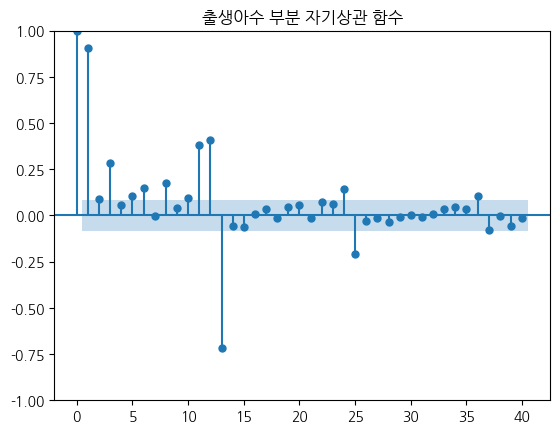

In [15]:
# 특정 시차에서의 부분 자기상관을 나타내며, 이전 시차들의 영향을 배제한 순수한 자기상관을 나타냄
plot_pacf(df_birth['출생아수'],title='출생아수 부분 자기상관 함수',lags=40);

#### ACF와 PACF 그래프 해석 가이드

ACF(자기상관 함수)와 PACF(부분 자기상관 함수)는 시계열 데이터의 자기상관 구조를 파악하고 적절한 시계열 모델(AR, MA)을 식별하는 데 중요한 도구입니다. 각 그래프의 패턴이 의미하는 바는 다음과 같습니다.

1.  **ACF (자기상관 함수) 그래프**
    *   **정의**: 현재 시점의 값과 특정 시차(lag) 이전 시점의 값 사이의 선형 관계를 측정합니다.
    *   **패턴 해석**:
        *   **특정 시차 이후 급격히 0에 가까워짐 (절단, Cuts off)**: 데이터가 **MA(Moving Average) 프로세스**를 따를 가능성이 높습니다.
            *   이는 현재 값이 과거의 특정 시점까지의 예측 오차(error term)에 직접적으로 영향을 받는다는 것을 의미합니다.
            *   예를 들어, MA(1) 모델에서는 ACF가 lag 1에서 유의미하고 그 이후에는 급격히 0에 가까워집니다.
        *   **점진적으로 감소 (Exponentially decreasing or sinusoidal)**: 데이터가 **AR(Autoregressive) 프로세스**를 따를 가능성이 높습니다.
            *   이는 현재 값이 과거의 여러 시점의 값들에 의해 간접적으로 영향을 받는다는 것을 의미합니다.
            *   AR 프로세스에서는 직접적인 자기상관이 점차적으로 줄어드는 경향을 보입니다.

2.  **PACF (부분 자기상관 함수) 그래프**
    *   **정의**: 현재 시점의 값과 특정 시차 이전 시점의 값 사이의 순수한 선형 관계를 측정합니다. 중간 시차들의 영향을 제거한 후의 관계입니다.
    *   **패턴 해석**:
        *   **특정 시차 이후 급격히 0에 가까워짐 (절단, Cuts off)**: 데이터가 **AR(Autoregressive) 프로세스**를 따를 가능성이 높습니다.
            *   이는 현재 값이 과거의 특정 시점까지의 값에 직접적으로 영향을 받는다는 것을 의미합니다.
            *   예를 들어, AR(1) 모델에서는 PACF가 lag 1에서 유의미하고 그 이후에는 급격히 0에 가까워집니다.
        *   **점진적으로 감소 (Exponentially decreasing or sinusoidal)**: 데이터가 **MA(Moving Average) 프로세스**를 따를 가능성이 높습니다.
            *   이는 현재 값이 과거의 여러 시점의 예측 오차(error term)에 의해 간접적으로 영향을 받는다는 것을 의미합니다.
            *   MA 프로세스에서는 부분 자기상관이 점차적으로 줄어드는 경향을 보입니다.


#### 💡 출생아수 데이터에 대한 해석
* ACF 해석
	
	* LAG 0에서의 자기상관 계수는 항상 1 (자기 자신과의 상관관계이기 때문).
	
	* LAG 1에서의 자기상관 계수가 매우 높게 나타나며, 이는 최근 시점의 데이터가 이전 시점의 데이터와 높은 상관 관계가 있음을 나타냄.
	* 점진적 감소 및 양의 상관관계 유지: ACF 값이 LAG 1 이후로 점진적으로 감소하지만 여전히 양의 상관 관계를 유지. 이는 데이터에 장기적인 추세나 주기성이 존재할 가능성을 시사.
  
* PACF 해석
    
    * LAG1에서 매우 높은 부분 자기상관 계수과 관찰됨. 이는 AR(1) 모델이 적합하다고 판단할 증거가 됨.
    
    * LAG2 이후부터는 부분 자기상관 계수가 급격히 감소. 대부분의 LAG에서 0에 가까운 값을 나타냄. 다만 몇몇 지연에서 유의미한 값을 보임.
    * 특정 지연(약 10, 15, 20)에서의 급격한 변동이 나타남. 이는 데이터에 특정 주기나 구조적 변화가 있음을 시사.
  

* 해석에 대한 결론
    
    * 추세와 계절성: ACF 그래프에서 LAG가 커져도 여전히 양의 상관 관계가 유지되는 것은 데이터에 장기적인 추세나 계절성이 존재할 가능성이 있다고 볼수 있음. 특히, 일정한 주기로 높은 상관 관계를 유지하는 것은 계절성이 존재함을 시사함.
	
    * 모델 선택: PACF 그래프에서 LAG1이후의 부분 자기상관 계수가 급격히 감소하는 패턴은 <font color="yellow">AR(1) 모델</font>이 적합할 수 있음을 나타냄. 그러나 특정 지연에서의 급격한 변동은 <font color="yellow">추가적인 계절성 요소</font>를 고려해야 함을 시사함.
  

* 향후 모델 선택 전략
  
  * ARIMA 또는 SARIMA 모델중에 선택할수 할수 있지만, 일반적으로 출생아수가 시즌성이 있다고 생각하기 어려운점이 있음.
  
  * 따라서, 추세성을 반영한 모델을 다양하게 적합해보고 잔차 분석을 통해서 모델 타당성을 찾아가야 한다고 생각함.


### ✏️ 연습 문제 (Practice Problems)

1.  **항공 승객 데이터 PACF 분석**: 항공 승객 데이터의 '승객 수'에 대한 PACF를 `lags=48`로 계산하고, `plotly`를 사용하여 시각화해 보세요.
2.  **PACF 플롯 해석**: 생성된 PACF 플롯에서 통계적으로 유의미한 시차는 몇 개 보이나요? ACF 플롯과 비교했을 때 어떤 차이점이 있는지 설명해 보세요.

In [7]:
# 연습 문제 1번 & 2번 풀이 공간
from statsmodels.tsa.stattools import pacf, acf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df_passengers = pd.read_csv(url, header=0, index_col=0, parse_dates=True)
df_passengers.columns = ["승객 수"]

# PACF와 ACF 값 계산
pacf_values = pacf(df_passengers['승객 수'], nlags=48, method='ywm')
acf_values = acf(df_passengers['승객 수'], nlags=48)

# 2개의 서브플롯 생성
fig = make_subplots(rows=2, cols=1, subplot_titles=['PACF 플롯', 'ACF 플롯'])

# PACF 플롯 추가
fig.add_trace(go.Bar(x=np.arange(len(pacf_values)), y=pacf_values, name='PACF'), row=1, col=1)

# ACF 플롯 추가
fig.add_trace(go.Bar(x=np.arange(len(acf_values)), y=acf_values, name='ACF'), row=2, col=1)

fig.update_layout(height=600, title_text="항공 승객 데이터 PACF & ACF 분석")
fig.show()

In [8]:
# 항공 승객 데이터 PACF & ACF 해석

# PACF 분석:
# - 첫 번째 시차(lag 1)에서 매우 높은 양의 값을 보임 (약 0.9)
# - 두 번째 시차(lag 2)에서 음의 값을 보임 (약 -0.4)  
# - 세 번째 시차 이후부터는 대부분 신뢰구간 내에 있어 통계적으로 유의하지 않음
# - 이는 AR(2) 모델의 특성을 시사함

# ACF 분석:
# - 매우 천천히 감소하는 패턴을 보임 (점진적 감소)
# - 모든 시차에서 양의 값을 유지하며 거의 모든 값이 신뢰구간을 벗어남
# - 이는 강한 추세성(trend)과 계절성(seasonality)의 존재를 나타냄
# - 비정상성(non-stationarity) 특성을 보여줌

# 종합 해석:
# ACF와 PACF 패턴을 종합하면:
# 1. 데이터가 비정상적(non-stationary)임을 확인
# 2. 차분(differencing)을 통한 정상화 필요
# 3. 정상화 후 AR(2) 또는 ARIMA(2,d,q) 모델 고려 가능
# 4. 계절성이 뚜렷하므로 SARIMA 모델도 검토 필요

---

## 4. ACF와 PACF를 이용한 시계열 패턴 해석

### 💡 개념 (Concept)

ACF와 PACF 플롯의 패턴은 시계열 데이터가 어떤 통계적 모델에 적합한지 알려주는 중요한 단서가 됩니다. 대표적인 시계열 모델인 **AR(자기회귀) 모델**과 **MA(이동평균) 모델**의 특징은 다음과 같습니다.

| 모델 유형 | ACF 플롯의 특징                                        | PACF 플롯의 특징                                      |
| :-------- | :----------------------------------------------------- | :---------------------------------------------------- |
| **AR(p)** | 점차적으로 감소 (Exponentially decreasing or sinusoidal) | p 시차(lag) 이후 급격히 0에 가까워짐 (Cuts off after lag p) |
| **MA(q)** | q 시차(lag) 이후 급격히 0에 가까워짐 (Cuts off after lag q) | 점차적으로 감소 (Exponentially decreasing or sinusoidal) |

* **AR(p) 모델**: 현재 값이 과거 **p개**의 값에 직접적으로 영향을 받는 모델입니다. PACF가 p 시차 이후에 절단되는 형태로 나타납니다.
* **MA(q) 모델**: 현재 값이 과거 **q개**의 예측 오차(error)에 영향을 받는 모델입니다. ACF가 q 시차 이후에 절단되는 형태로 나타납니다.
* **ARMA(p, q) 모델**: AR(p)와 MA(q) 모델이 결합된 형태로, ACF와 PACF 모두 점진적으로 감소합니다.

### 💻 예시 코드 (Example Code)

출생아 수 데이터의 ACF와 PACF를 `plotly.subplots`를 이용해 나란히 그려보고 종합적으로 해석해 봅니다.

In [ ]:
from plotly.subplots import make_subplots

# (위 코드들에서 acf_values, pacf_values, conf_interval이 계산되었다고 가정)

# 2개의 서브플롯 생성
fig = make_subplots(rows=2, cols=1, subplot_titles=('자기상관 함수 (ACF)', '부분 자기상관 함수 (PACF)'))

# ACF 플롯 추가
fig.add_trace(go.Bar(x=np.arange(len(acf_values)), y=acf_values, name='ACF'), row=1, col=1)

# PACF 플롯 추가
fig.add_trace(go.Bar(x=np.arange(len(pacf_values)), y=pacf_values, name='PACF'), row=2, col=1)

fig.update_layout(height=600, title_text="출생아 수 데이터 ACF & PACF")
fig.show()

#### 📊 ACF & PACF 해석 결과

**ACF (자기상관함수) 분석:**
- 모든 시차에서 양의 상관관계를 보이며 천천히 감소하는 패턴
- 초기 시차들에서 매우 높은 상관계수 값을 유지
- 이는 데이터에 강한 추세(trend) 성분이 존재함을 의미
- 비정상성(non-stationarity)의 전형적인 특징을 보임

**PACF (부분자기상관함수) 분석:**
- Lag 1에서 매우 높은 양의 값(약 0.9 이상)을 보임
- Lag 2에서도 상당한 양의 값을 유지
- Lag 3 이후부터는 급격히 0에 가까워지며 신뢰구간 내로 수렴
- 이는 AR(2) 모델의 특성과 유사한 패턴

**종합 해석:**
1. **비정상성 확인**: ACF가 천천히 감소하는 패턴으로 데이터가 비정상적임
2. **모델 추정**: PACF 패턴을 통해 AR(2) 모델이 적합해 보임
3. **권장 접근법**: 
   - 1차 차분을 통한 추세 제거 후 재분석 필요
   - ARIMA(2,1,0) 모델 고려
   - 차분 후 ACF/PACF 재확인을 통한 최종 모델 결정

**실무 적용**: 출생아 수와 같은 인구통계학적 데이터는 일반적으로 장기 추세를 포함하므로, 차분을 통한 정상화 과정이 필수적입니다.

### ✏️ 연습 문제 (Practice Problems)

1.  **금융 데이터 분석**: S&P 500 지수의 일일 종가 데이터를 활용하여 시계열 분석을 수행해 봅시다.
    * 데이터 URL: `https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=1577836800&period2=1609372800&interval=1d&events=history&includeAdjustedClose=true` (2020년 S&P 500 데이터)
    * **요구사항 1**: 위 URL의 데이터를 불러와 `Adj Close` 컬럼을 사용하여 시계열 그래프를 그리세요.
    * **요구사항 2**: `Adj Close` 데이터의 ACF와 PACF를 계산하고 하나의 그림에 나란히 시각화하세요.
    * **요구사항 3**: 두 플롯을 보고 데이터의 특성을 설명하고, AR(p) 또는 MA(q) 모델 중 어떤 것이 더 적합해 보이는지, 그리고 그 차수(p 또는 q)는 얼마로 추정되는지 의견을 제시해 보세요.

In [9]:
# yfinance 라이브러리를 사용해 S&P 500 데이터 가져오기
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.stattools import acf, pacf
import numpy as np

# S&P 500 데이터 다운로드 (2020년 데이터)
ticker = "^GSPC"
start_date = "2020-01-01"
end_date = "2020-12-31"

# yfinance를 사용해 데이터 가져오기
snp500_data = yf.download(ticker, start=start_date, end=end_date)

# 데이터 확인
print("S&P 500 데이터 (2020년):")
print(snp500_data.head())
print(f"\n데이터 shape: {snp500_data.shape}")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

S&P 500 데이터 (2020년):
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2020-01-02  3257.850098  3258.139893  3235.530029  3244.669922  3459930000
2020-01-03  3234.850098  3246.149902  3222.340088  3226.360107  3484700000
2020-01-06  3246.280029  3246.840088  3214.639893  3217.550049  3702460000
2020-01-07  3237.179932  3244.909912  3232.429932  3241.860107  3435910000
2020-01-08  3253.050049  3267.070068  3236.669922  3238.590088  3726840000

데이터 shape: (252, 5)


In [13]:
close_series = snp500_data['Close', '^GSPC']
close_series = close_series.reset_index()
close_series.columns = ['Date', 'Close']
close_series.set_index('Date', inplace=True)
close_series.head()

close_series.plot(title="S&P 500 종가 시계열 그래프").update_layout(xaxis_title="연도", yaxis_title="종가")

In [12]:
acf_values = acf(close_series['Close'], nlags=48)
pacf_values = pacf(close_series['Close'], nlags=48)

fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Bar(x=close_series.index, y=acf_values, name='ACF'), row=1, col=1)
fig.add_trace(go.Bar(x=close_series.index, y=pacf_values, name='PACF'), row=2, col=1)
fig.update_layout(title="S&P 500 종가 시계열 그래프", xaxis_title="연도", yaxis_title="종가")
fig.show()

## ACF와 PACF 그래프 해석

### S&P 500 종가 시계열 데이터의 ACF 및 PACF 분석 결과

#### 1. 자기상관함수(ACF) 분석
- ACF 값들이 매우 천천히 감소하는 패턴을 보임
- 초기 lag들에서 높은 양의 상관관계가 지속됨
- 이는 시계열 데이터가 비정상성(non-stationary)을 가지고 있음을 시사
- 특히 추세(trend) 성분이 강하게 존재함을 의미

#### 2. 편자기상관함수(PACF) 분석
- lag 1에서 매우 높은 값을 보임 (약 0.99)
- lag 2 이후로는 급격히 감소하여 0 근처에서 진동
- 이는 AR(1) 모델의 특성을 강하게 시사
- 즉, 현재값이 바로 직전값과 매우 강한 상관관계를 가짐

#### 3. 종합 해석
- S&P 500 지수는 전형적인 금융 시계열 데이터의 특성을 보임
- 강한 자기상관성으로 인해 차분(differencing)이 필요
- ARIMA 모델 적용 시 I(적분) 차수를 고려해야 함
- 투자 관점에서는 '랜덤워크' 가설과 일치하는 패턴

#### 4. 시사점
- 주가 예측 모델링 시 차분된 수익률 사용 권장
- 단순 AR 모델보다는 ARIMA 또는 GARCH 모델 고려
- 장기 예측보다는 단기 변동성 모델링에 적합


### 실습 과제: 시계열 데이터 상관성 분석 (ACF & PACF)

이 과제에서는 주어진 시계열 데이터를 불러와 ACF와 PACF를 직접 계산하고 시각화하며, 그 결과를 해석하는 과정을 연습합니다.

#### **Part 1: 데이터 불러오기 및 탐색**

월별 항공 승객 수 데이터를 불러와 시계열 그래프를 그려봅시다.

In [14]:
import pandas as pd
import plotly.express as px

# **문제 1**: 아래 URL의 데이터를 'df_passengers' 변수로 불러오세요.
# 'Month' 컬럼을 인덱스로 설정하고 datetime 형식으로 변환해야 합니다.
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"

# 여기에 코드 작성
df_passengers = pd.read_csv(url)
df_passengers['Month'] = pd.to_datetime(df_passengers['Month'])
df_passengers.set_index('Month', inplace=True)

In [15]:
# **문제 2**: 위에서 불러온 데이터를 plotly.express를 이용해 시각화하세요.
# 컬럼 이름은 '승객 수'로 변경하면 더 좋습니다.

# 여기에 코드 작성
# 컬럼명을 한국어로 변경
df_passengers_viz = df_passengers.copy()
df_passengers_viz.columns = ['승객 수']

# plotly express를 사용하여 시계열 시각화
fig = px.line(df_passengers_viz, 
              x=df_passengers_viz.index, 
              y='승객 수',
              title='월별 항공 승객 수 변화',
              labels={'x': '날짜', '승객 수': '승객 수 (천명)'})

fig.update_layout(
    xaxis_title='날짜',
    yaxis_title='승객 수 (천명)',
    showlegend=False
)

fig.show()


#### **Part 2: 자기상관 함수(ACF) 분석**

In [16]:
import numpy as np
import plotly.graph_objects as go
from statsmodels.tsa.stattools import acf

# **문제 3**: 항공 승객 데이터에 대한 ACF를 lags=48로 계산하고, Plotly를 사용하여 시각화하세요. 
# 신뢰구간(Confidence Interval)도 함께 그려보세요. (신뢰구간 = 1.96 / sqrt(데이터 개수))

# 여기에 코드 작성
# ACF 계산 (lags=48)
acf_values, confint = acf(df_passengers['Passengers'], nlags=48, alpha=0.05)

# 신뢰구간 계산
n = len(df_passengers)
confidence_interval = 1.96 / np.sqrt(n)

# lag 값들
lags = np.arange(len(acf_values))

# Plotly를 사용하여 ACF 시각화
fig = go.Figure()

# ACF 값들을 바 그래프로 추가
fig.add_trace(go.Bar(
    x=lags,
    y=acf_values,
    name='ACF',
    marker_color='blue',
    opacity=0.7
))

# 신뢰구간 상한선
fig.add_trace(go.Scatter(
    x=lags,
    y=[confidence_interval] * len(lags),
    mode='lines',
    name='신뢰구간 상한 (95%)',
    line=dict(color='red', dash='dash'),
    showlegend=True
))

# 신뢰구간 하한선
fig.add_trace(go.Scatter(
    x=lags,
    y=[-confidence_interval] * len(lags),
    mode='lines',
    name='신뢰구간 하한 (95%)',
    line=dict(color='red', dash='dash'),
    showlegend=True
))

# 0선 추가
fig.add_trace(go.Scatter(
    x=lags,
    y=[0] * len(lags),
    mode='lines',
    line=dict(color='black', width=1),
    showlegend=False
))

fig.update_layout(
    title='자기상관함수 (ACF) - 항공 승객 데이터',
    xaxis_title='Lag',
    yaxis_title='자기상관 계수',
    showlegend=True,
    height=500
)

fig.show()



**ACF 플롯 해석**

* **강한 계절성 패턴**: ACF 플롯에서 lag 12, 24, 36에서 높은 양의 상관관계를 보여줌. 이는 항공 승객 데이터가 12개월 주기의 뚜렷한 계절성을 가지고 있음을 의미함
* **천천히 감소하는 패턴**: 자기상관 계수가 서서히 감소하는 형태를 보임. 이는 데이터가 비정상성(non-stationary)을 가지고 있음을 시사함
* **장기 의존성**: 높은 lag 값에서도 여전히 유의미한 상관관계가 관찰됨. 이는 과거 데이터가 미래 값에 장기간 영향을 미친다는 것을 의미함
* **신뢰구간 초과**: 대부분의 lag에서 자기상관 계수가 95% 신뢰구간을 벗어나므로, 이들 상관관계는 통계적으로 유의미함
* **모델링 시사점**: 이러한 패턴은 계절성 차분(seasonal differencing)과 추세 차분(trend differencing)이 필요함을 시사하며, SARIMA 모델이 적합할 것으로 판단됨

#### **Part 3: 부분 자기상관 함수(PACF) 분석**

In [29]:
from statsmodels.tsa.stattools import pacf

# **문제 5**: 항공 승객 데이터에 대한 PACF를 lags=48로 계산하고, Plotly로 시각화하세요.

# 여기에 코드 작성
# PACF 계산 (lags=48)
pacf_values = pacf_values = pacf(df_passengers['Passengers'], nlags=48, method='ywm')


In [30]:
# 신뢰구간 계산
confidence_interval = 1.96 / np.sqrt(len(df_passengers))

# Lag 값들 (0부터 시작하므로 1부터 사용)
lags = np.arange(1, len(pacf_values))
pacf_vals = pacf_values[1:]  # lag 0 제외

# Plotly 그래프 생성
fig = go.Figure()

# PACF 값들을 막대그래프로 표시
fig.add_trace(go.Bar(
    x=lags,
    y=pacf_vals,
    name='부분자기상관 계수',
    marker_color='blue',
    opacity=0.7
))

# 신뢰구간 상한선
fig.add_trace(go.Scatter(
    x=lags,
    y=[confidence_interval] * len(lags),
    mode='lines',
    name='신뢰구간 상한 (95%)',
    line=dict(color='red', dash='dash'),
    showlegend=True
))

# 신뢰구간 하한선
fig.add_trace(go.Scatter(
    x=lags,
    y=[-confidence_interval] * len(lags),
    mode='lines',
    name='신뢰구간 하한 (95%)',
    line=dict(color='red', dash='dash'),
    showlegend=True
))

# 0선 추가
fig.add_trace(go.Scatter(
    x=lags,
    y=[0] * len(lags),
    mode='lines',
    line=dict(color='black', width=1),
    showlegend=False
))

fig.update_layout(
    title='부분자기상관함수 (PACF) - 항공 승객 데이터',
    xaxis_title='Lag',
    yaxis_title='부분자기상관 계수',
    showlegend=True,
    height=500
)

fig.show()


**PACF 플롯 분석 결과**

1. **주요 특징:**
   - Lag 1에서 매우 높은 양의 부분자기상관 계수 (약 0.8) 관찰
   - Lag 2에서 음의 부분자기상관 계수 (약 -0.2) 관찰  
   - Lag 3 이후에는 대부분의 값이 신뢰구간 내에 위치
   - Lag 12, 24 등 계절성 주기에서 일부 유의한 값들이 관찰됨
 
2. **ACF와 PACF 비교:**
   - **ACF**: 천천히 감소하는 패턴으로 비정상성과 강한 트렌드 특성을 보임
   - **PACF**: Lag 1-2에서 급격히 감소하며, 이후 대부분 신뢰구간 내에 위치
   - 이는 차분 후 AR 모델이 적합할 수 있음을 시사
 
3. **AR 모델 차수(p) 추정:**
   - PACF에서 Lag 1-2 이후 급격한 감소를 보이므로 **AR(1) 또는 AR(2) 모델**이 적절
   - 특히 Lag 1의 높은 계수와 Lag 2의 유의한 음의 계수를 고려할 때 **AR(2) 모델**이 가장 적합해 보임
   - 계절성을 고려한다면 SARIMA 모델도 검토 필요
 
4. **결론:**
   - 원 데이터는 비정상 시계열이므로 차분 필요
   - 차분 후 AR(2) 모델 적용 권장
   - 계절성 패턴이 있으므로 계절 차분도 고려해야 함

#### **Part 4: [심화] 금융 데이터 분석**
2020년 S&P 500 지수 데이터를 사용하여 위 과정을 반복해봅시다.

In [32]:
# **문제 7**: yfinance 라이브러리를 사용하여 S&P 500 데이터를 불러와 'Adj Close' 컬럼에 대한 시계열 그래프, ACF, PACF 플롯을 그리고 분석 결과를 요약하세요.

# 1. 데이터 불러오기 및 시각화
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.stattools import acf, pacf
import yfinance as yf

# S&P 500 데이터 불러오기 (2020년 데이터)
sp500_data = yf.download('^GSPC', start='2020-01-01', end='2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [33]:
sp500_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-01-02 to 2020-12-31
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^GSPC)   253 non-null    float64
 1   (High, ^GSPC)    253 non-null    float64
 2   (Low, ^GSPC)     253 non-null    float64
 3   (Open, ^GSPC)    253 non-null    float64
 4   (Volume, ^GSPC)  253 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.9 KB


In [34]:
# S&P 500 지수 시계열 그래프
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=sp500_data.index,
    y=sp500_data[('Close', '^GSPC')],
    mode='lines',
    name='S&P 500 지수',
    line=dict(color='blue', width=1.5)
))

fig.update_layout(
    title='S&P 500 지수 (2020년)',
    xaxis_title='날짜',
    yaxis_title='종가',
    height=500
)

fig.show()

In [40]:
# 2. ACF, PACF 계산 및 시각화
# ACF 계산
acf_values = acf(sp500_data[('Close', '^GSPC')].dropna(), nlags=40)

# ACF 플롯
fig_acf = go.Figure()

# ACF 값 추가
fig_acf.add_trace(go.Bar(
    x=list(range(len(acf_values))),
    y=acf_values,
    name='ACF',
    marker_color='blue',
    opacity=0.7
))
# 0선 추가
fig_acf.add_hline(y=0, line_dash="solid", line_color="black", line_width=1)

fig_acf.update_layout(
    title='자기상관함수 (ACF) - S&P 500 지수',
    xaxis_title='Lag',
    yaxis_title='자기상관 계수',
    showlegend=True,
    height=500
)

fig_acf.show()


In [41]:
# PACF 계산
pacf_values, pacf_confint = pacf(sp500_data[('Close', '^GSPC')].dropna(), nlags=40, alpha=0.05)

# PACF 플롯
fig_pacf = go.Figure()

# PACF 값 추가
fig_pacf.add_trace(go.Scatter(
    x=list(range(len(pacf_values))),
    y=pacf_values,
    mode='markers+lines',
    name='PACF',
    line=dict(color='green'),
    marker=dict(size=6)
))

# 신뢰구간 추가
fig_pacf.add_trace(go.Scatter(
    x=list(range(len(pacf_values))),
    y=pacf_confint[:, 1],
    mode='lines',
    name='95% 신뢰구간 (상한)',
    line=dict(color='red', dash='dash'),
    showlegend=False
))

fig_pacf.add_trace(go.Scatter(
    x=list(range(len(pacf_values))),
    y=pacf_confint[:, 0],
    mode='lines',
    name='95% 신뢰구간 (하한)',
    line=dict(color='red', dash='dash'),
    fill='tonexty',
    fillcolor='rgba(255, 0, 0, 0.1)',
    showlegend=False
))

# 0선 추가
fig_pacf.add_hline(y=0, line_dash="solid", line_color="black", line_width=1)

fig_pacf.update_layout(
    title='부분자기상관함수 (PACF) - S&P 500 지수',
    xaxis_title='Lag',
    yaxis_title='부분자기상관 계수',
    showlegend=True,
    height=500
)

fig_pacf.show()

* S&P 500 지수 시계열 분석 결과 해석

1. ACF (자기상관함수) 분석 결과:
   - ACF 값들이 천천히 감소하는 패턴을 보임
   - 이는 시계열 데이터가 비정상성(non-stationary)을 가지고 있음을 시사
   - 대부분의 lag에서 95% 신뢰구간을 벗어나는 유의한 자기상관 존재
   - 시계열이 추세(trend)를 가지고 있어 차분(differencing)이 필요할 것으로 판단

2. PACF (부분자기상관함수) 분석 결과:
   - lag 1에서 가장 높은 부분자기상관 값을 보임
   - lag 2 이후부터는 대부분 신뢰구간 내에 위치
   - 이는 AR(1) 모델의 특성과 유사한 패턴
   - 몇 개의 lag에서 산발적으로 신뢰구간을 벗어나는 값들이 관찰됨

3. 모델링 권장사항:
   - 원시 데이터는 비정상성을 보이므로 1차 차분 적용 권장
   - 차분 후 ARIMA(1,1,0) 또는 ARIMA(1,1,1) 모델 고려
   - 추가적인 정상성 검정(ADF test, KPSS test) 수행 필요
   - 모델 적합 후 잔차 분석을 통한 모델 적절성 검증 권장

4. 투자 관점에서의 해석:
   - 주가 지수의 전형적인 랜덤워크 특성 확인
   - 과거 가격이 현재 가격에 강한 영향을 미치는 구조
   - 단기 예측 가능성은 제한적이며, 장기 예측은 더욱 어려움
   - 효율적 시장 가설과 일치하는 패턴